In [363]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
from sklearn import svm

提取数据

In [364]:
path1 = 'data/ex6data1.mat'
data1 = sio.loadmat(path1)
data = pd.DataFrame(data1['X'], columns=['X1', 'X2'])
data['Y'] = data1['y']

画图

In [365]:
def plot(data):
    negtive = data[data['Y'].isin([0])]
    postive = data[data['Y'].isin([1])]
    fig, ax = plt.subplots(figsize= (12,8))
    ax.scatter(negtive['X1'], negtive['X2'], marker= 'o', c= 'yellow')
    ax.scatter(postive['X1'], postive['X2'], marker= '+', c= 'black')
    return fig, ax

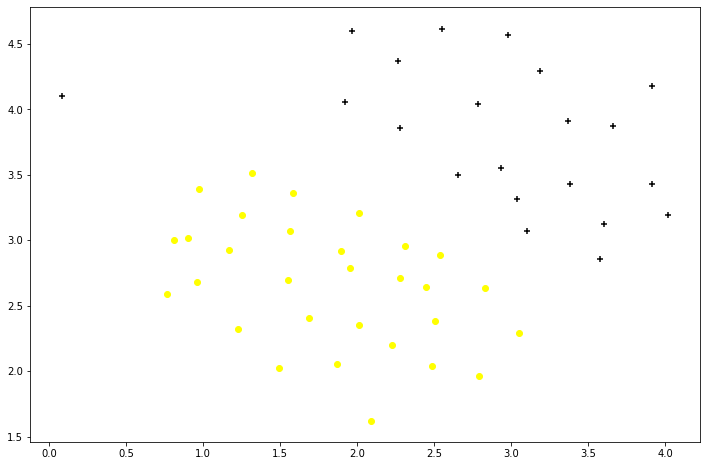

In [366]:
plot(data)
#show完之后Figure对象就消失了。
plt.show()

训练线性SVM

D:\pycharm\pro\test\venv\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5915553538938594


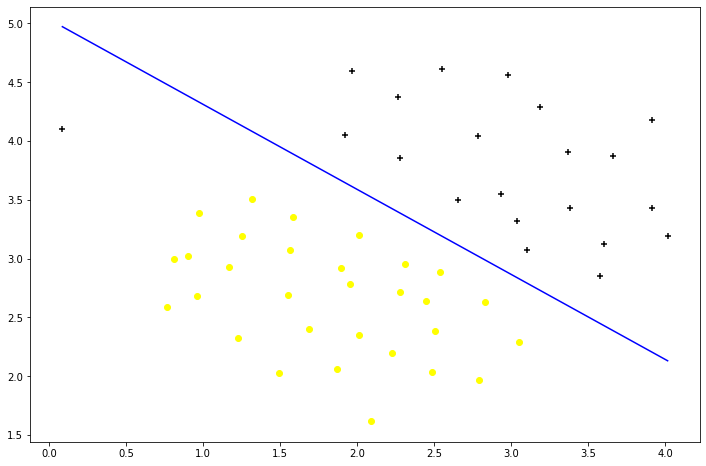

In [367]:
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc.fit(data[['X1', 'X2']], data['Y'])
svc.score(data[['X1', 'X2']], data['Y'])
coef = svc.coef_  #系数
intercept = svc.intercept_  #截距
print(coef[0][0])
fig, ax =  plot(data)
plot_X = np.linspace(np.min(data['X1']), np.max(data['X1']), 100)
ax.plot(plot_X, -(plot_X*coef[0][0] + intercept) / coef[0][1], c= 'blue')
plt.show()